

> Indented block



 

   
   









Bone marrow transplant: children Data Set
Abstract: The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.
	

*   Data Set Characteristics:  Multivariate

*   Number of Instances:187

*   Area:Life

*   Attribute Characteristics:Integer, Real
*   Number of Attributes:39


*   Date Donated:2020-04-21


*   Associated Tasks:Classification, Regression


*   Missing Values:Yes

Link: [Bone marrow transplant: children Data Set](https://archive.ics.uci.edu/ml/datasets/Bone+marrow+transplant%3A+children)

Data Set Information:

The data set describes pediatric patients with several hematologic diseases: malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, chronic myelogenous leukemia, myelodysplastic syndrome) and nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy). All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.

The motivation of the study was to identify the most important factors influencing the success or failure of the transplantation procedure. In particular, the aim was to verify the hypothesis that increased dosage of CD34+ cells / kg extends overall survival time without simultaneous occurrence of undesirable events affecting patients' quality of life (KawÅ‚ak et al., 2010).

The data set has been used in our work concerning survival rules (WrÃ³bel et al., 2017) and user-guided rule induction (Sikora et al., 2019). The authors of the research on stem cell transplantation (KawÅ‚ak et al., 2010) who inspired our study also contributed to the set.


In [ ]:
#####Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

*Importing* Dataset & Data preprocessing

In [ ]:
#Importing Dataset
df = pd.read_csv('/content/drive/MyDrive/Bone Marrow/bone-marrow.csv')
df.head()

,id,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,gender_match,ABO_match,CMV_status,HLA_match,HLA_mismatch,antigen,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,1,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,plus,present,ALL,malignant,other,matched,3,10/10,matched,0,0,matched,high,peripheral_blood,no,7.20,5.38,1.33876,19.0,51.0,yes,yes,32.0,no,no,999.0,0
1,2,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,plus,absent,ALL,malignant,other,matched,0,10/10,matched,0,0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16.0,37.0,yes,no,1000000.0,no,yes,163.0,1
2,3,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,plus,present,ALL,malignant,other,matched,2,10/10,matched,0,0,matched,low,bone_marrow,no,7.94,0.42,19.01323,23.0,20.0,yes,no,1000000.0,no,yes,435.0,1
3,4,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,plus,absent,AML,malignant,other,mismatched,1,10/10,matched,0,0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23.0,29.0,yes,yes,19.0,?,no,53.0,1
4,5,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,minus,present,chronic,malignant,other,mismatched,0,9/10,matched,2,1,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14.0,14.0,no,no,1000000.0,no,no,2043.0,0


In [ ]:
df.shape

(187, 38)

In [ ]:
df.dtypes

id                             int64
donor_age                    float64
donor_age_below_35            object
donor_ABO                     object
donor_CMV                     object
recipient_age                float64
recipient_age_below_10        object
recipient_age_int             object
recipient_gender              object
recipient_body_mass           object
recipient_ABO                 object
recipient_rh                  object
recipient_CMV                 object
disease                       object
disease_group                 object
gender_match                  object
ABO_match                     object
CMV_status                    object
HLA_match                     object
HLA_mismatch                  object
antigen                       object
allel                         object
HLA_group_1                   object
risk_group                    object
stem_cell_source              object
tx_post_relapse               object
CD34_x1e6_per_kg             float64
C

In [ ]:
df.columns

Index(['id', 'donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

Data Cleaning


In [ ]:
####A brief of data####
df.describe()

,id,donor_age,recipient_age,CD34_x1e6_per_kg,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,33.472068,9.931551,11.891781,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,54.126395,8.271826,5.305639,9.914386,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,1.000000,18.646575,0.600000,0.790000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,47.500000,27.039726,5.050000,5.350000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,94.000000,33.550685,9.600000,9.720000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,140.500000,40.117808,14.050000,15.415000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,187.000000,55.553425,20.200000,57.780000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


In [ ]:
#selected_feat

In [ ]:
#selected_columns

In [ ]:
df.columns

Index(['id', 'donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'ANC_recovery', 'PLT_recovery',
       'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'time_to_acute_GvHD_III_IV', 'extensive_chronic_GvHD', 'relapse',
       'survival_time', 'survival_status'],
      dtype='object')

A brief of whole data

In [ ]:
#####Dropping unnecesary column#######
#recipient_age_below_10, recipient_age_int, gender_match, HLA_mismatch, antigen, ', 'HLA_group_1', acute_GvHD_II_III_IV, acute_GvHD_III_IV

df.drop(['id','recipient_age_below_10','recipient_age_int','gender_match','HLA_mismatch','antigen','acute_GvHD_II_III_IV','acute_GvHD_III_IV'],axis=1, inplace=True)

In [ ]:
df

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,ABO_match,CMV_status,HLA_match,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,male,35.0,A,plus,present,ALL,malignant,matched,3,10/10,0,matched,high,peripheral_blood,no,7.20,5.38,1.33876,19.0,51.0,32.0,no,no,999.0,0
1,23.342466,yes,B,absent,4.0,male,20.6,B,plus,absent,ALL,malignant,matched,0,10/10,0,matched,low,bone_marrow,no,4.50,0.41,11.078295,16.0,37.0,1000000.0,no,yes,163.0,1
2,26.394521,yes,B,absent,6.6,male,23.4,B,plus,present,ALL,malignant,matched,2,10/10,0,matched,low,bone_marrow,no,7.94,0.42,19.01323,23.0,20.0,1000000.0,no,yes,435.0,1
3,39.684932,no,A,present,18.1,female,50.0,AB,plus,absent,AML,malignant,mismatched,1,10/10,0,matched,low,bone_marrow,no,4.25,0.14,29.481647,23.0,29.0,19.0,?,no,53.0,1
4,33.358904,yes,A,absent,1.3,female,9.0,AB,minus,present,chronic,malignant,mismatched,0,9/10,1,one_antigen,high,peripheral_blood,no,51.85,13.05,3.972255,14.0,14.0,1000000.0,no,no,2043.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,37.575342,no,A,present,12.9,male,44.0,A,minus,present,lymphoma,malignant,matched,3,10/10,0,matched,high,peripheral_blood,yes,11.08,4.39,2.52275,15.0,22.0,16.0,no,yes,385.0,1
183,22.895890,yes,A,absent,13.9,female,44.5,0,plus,present,AML,malignant,mismatched,2,10/10,0,matched,high,peripheral_blood,no,4.64,4.47,1.038858,12.0,30.0,1000000.0,no,no,634.0,1
184,27.347945,yes,A,present,10.4,female,33.0,B,plus,present,nonmalignant,nonmalignant,mismatched,3,10/10,0,matched,low,peripheral_blood,no,7.73,4.73,1.635559,16.0,16.0,1000000.0,no,no,1895.0,0
185,27.780822,yes,A,absent,8.0,male,24.0,0,plus,absent,chronic,malignant,mismatched,0,9/10,1,one_antigen,low,peripheral_blood,no,15.41,1.91,8.07777,13.0,14.0,54.0,yes,no,382.0,1




```

```

**Dropping redundant column  as they are not requiered**

In [ ]:
#New Dataframe
df.shape

(187, 30)

In [ ]:
df.nunique()

donor_age                    187
donor_age_below_35             2
donor_ABO                      4
donor_CMV                      3
recipient_age                125
recipient_gender               2
recipient_body_mass          131
recipient_ABO                  5
recipient_rh                   3
recipient_CMV                  3
disease                        5
disease_group                  2
ABO_match                      3
CMV_status                     5
HLA_match                      4
allel                          6
HLA_group_1                    7
risk_group                     2
stem_cell_source               2
tx_post_relapse                2
CD34_x1e6_per_kg             183
CD3_x1e8_per_kg              164
CD3_to_CD34_ratio            183
ANC_recovery                  18
PLT_recovery                  50
time_to_acute_GvHD_III_IV     28
extensive_chronic_GvHD         3
relapse                        2
survival_time                174
survival_status                2
dtype: int

In [ ]:
df['ABO_match'].unique()

array(['matched', 'mismatched', '?'], dtype=object)

We will remove '?' later

In [ ]:
df['recipient_ABO'].unique()

array(['A', 'B', 'AB', '0', '?'], dtype=object)

In [ ]:
######### Separating Catagorical & Neumerical Column#########
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

Separating numerical & categorical data from main dataframe

In [ ]:
cat_col,num_col=extract_cat_num(df)

In [ ]:
cat_col

['donor_age_below_35',
 'donor_ABO',
 'donor_CMV',
 'recipient_gender',
 'recipient_body_mass',
 'recipient_ABO',
 'recipient_rh',
 'recipient_CMV',
 'disease',
 'disease_group',
 'ABO_match',
 'CMV_status',
 'HLA_match',
 'allel',
 'HLA_group_1',
 'risk_group',
 'stem_cell_source',
 'tx_post_relapse',
 'CD3_x1e8_per_kg',
 'CD3_to_CD34_ratio',
 'extensive_chronic_GvHD',
 'relapse']

In [ ]:
num_col

['donor_age',
 'recipient_age',
 'CD34_x1e6_per_kg',
 'ANC_recovery',
 'PLT_recovery',
 'time_to_acute_GvHD_III_IV',
 'survival_time',
 'survival_status']

In [ ]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

donor_age_below_35 has ['yes' 'no'] values 


donor_ABO has ['A' 'B' 'AB' '0'] values 


donor_CMV has ['present' 'absent' '?'] values 


recipient_gender has ['male' 'female'] values 


recipient_body_mass has ['35.0' '20.6' '23.4' '50.0' '9.0' '40.0' '51.0' '56.0' '20.5' '16.5'
 '10.5' '47.0' '18.1' '42.0' '55.0' '30.0' '97.8' '6.0' '64.0' '62.0'
 '43.2' '31.0' '39.3' '23.8' '26.8' '6.4' '17.0' '14.3' '38.3' '20.0'
 '23.0' '15.0' '49.6' '10.0' '11.25' '63.0' '43.5' '48.0' '15.3' '29.0'
 '41.4' '76.0' '34.1' '60.4' '48.8' '38.5' '28.5' '7.5' '19.5' '8.15'
 '14.0' '37.0' '13.0' '68.0' '52.0' '61.0' '54.9' '11.9' '49.0' '30.8'
 '45.5' '46.7' '58.0' '56.5' '16.0' '26.5' '28.0' '26.0' '37.5' '44.3'
 '43.0' '61.3' '14.1' '34.0' '62.5' '11.2' '72.5' '24.5' '70.0' '?' '22.6'
 '54.1' '51.1' '24.3' '19.0' '33.0' '17.2' '73.0' '55.2' '18.6' '52.7'
 '25.2' '19.6' '25.0' '90.0' '26.9' '32.0' '17.6' '65.0' '9.6' '50.6'
 '60.0' '54.5' '51.3' '12.0' '59.0' '20.8' '42.4' '44.5' '103.4' '71.0'
 '58.9'

Some neumerical data is in the cat_col. We will add this in num_col

In [ ]:
#coverting data_types
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors='coerce')

In [ ]:
features =['CD3_x1e8_per_kg','CD3_to_CD34_ratio','CD3_x1e8_per_kg','recipient_body_mass','CD3_to_CD34_ratio','survival_status']
for feature in features:
    convert_dtype(df,feature)

In [ ]:
###############Again finding cat column and num column to get the exatc info###########
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    #num_col=[col for col in df.columns if df[col].dtype=='float64']
    return cat_col,num_col
cat_col,num_col=extract_cat_num(df)

In [ ]:
cat_col

['donor_age_below_35',
 'donor_ABO',
 'donor_CMV',
 'recipient_gender',
 'recipient_ABO',
 'recipient_rh',
 'recipient_CMV',
 'disease',
 'disease_group',
 'ABO_match',
 'CMV_status',
 'HLA_match',
 'allel',
 'HLA_group_1',
 'risk_group',
 'stem_cell_source',
 'tx_post_relapse',
 'extensive_chronic_GvHD',
 'relapse']

In [ ]:
len(cat_col)

19

In [ ]:
num_col

['donor_age',
 'recipient_age',
 'recipient_body_mass',
 'CD34_x1e6_per_kg',
 'CD3_x1e8_per_kg',
 'CD3_to_CD34_ratio',
 'ANC_recovery',
 'PLT_recovery',
 'time_to_acute_GvHD_III_IV',
 'survival_time',
 'survival_status']

In [ ]:
len(num_col)

11

In [ ]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

donor_age_below_35 has ['yes' 'no'] values 


donor_ABO has ['A' 'B' 'AB' '0'] values 


donor_CMV has ['present' 'absent' '?'] values 


recipient_gender has ['male' 'female'] values 


recipient_ABO has ['A' 'B' 'AB' '0' '?'] values 


recipient_rh has ['plus' 'minus' '?'] values 


recipient_CMV has ['present' 'absent' '?'] values 


disease has ['ALL' 'AML' 'chronic' 'nonmalignant' 'lymphoma'] values 


disease_group has ['malignant' 'nonmalignant'] values 


ABO_match has ['matched' 'mismatched' '?'] values 


CMV_status has ['3' '0' '2' '1' '?'] values 


HLA_match has ['10/10' '9/10' '7/10' '8/10'] values 


allel has ['0' '1' '3' '2' '4' '?'] values 


HLA_group_1 has ['matched' 'one_antigen' 'mismatched' 'DRB1_cell' 'one_allel' 'two_diffs'
 'three_diffs'] values 


risk_group has ['high' 'low'] values 


stem_cell_source has ['peripheral_blood' 'bone_marrow'] values 


tx_post_relapse has ['no' 'yes'] values 


extensive_chronic_GvHD has ['no' '?' 'yes'] values 


relapse has 

Now this cat_col has only categorical data

In [ ]:
###########Checking NUll values############
df.isnull().sum()

donor_age                    0
donor_age_below_35           0
donor_ABO                    0
donor_CMV                    0
recipient_age                0
recipient_gender             0
recipient_body_mass          2
recipient_ABO                0
recipient_rh                 0
recipient_CMV                0
disease                      0
disease_group                0
ABO_match                    0
CMV_status                   0
HLA_match                    0
allel                        0
HLA_group_1                  0
risk_group                   0
stem_cell_source             0
tx_post_relapse              0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              5
CD3_to_CD34_ratio            5
ANC_recovery                 0
PLT_recovery                 0
time_to_acute_GvHD_III_IV    0
extensive_chronic_GvHD       0
relapse                      0
survival_time                0
survival_status              0
dtype: int64

In [ ]:
for col in num_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

donor_age has [22.830137 23.342466 26.394521 39.684932 33.358904 27.391781 34.520548
 21.435616 32.641096 28.783562 29.731507 36.8      40.863014 30.60274
 30.676712 41.164384 40.232877 40.821918 43.375342 31.745205 43.578082
 42.380822 31.545205 24.780822 30.50411  20.605479 40.969863 39.983562
 33.052055 39.172603 24.731507 24.353425 39.024658 23.446575 39.380822
 20.961644 49.860274 43.517808 40.536986 21.4      34.273973 20.471233
 44.380822 20.358904 31.526027 38.761644 28.805479 36.868493 29.772603
 28.821918 30.287671 33.120548 39.641096 39.632877 34.169863 31.194521
 30.389041 24.367123 37.287671 30.2      35.087671 29.161644 44.413699
 55.40274  43.715068 45.915068 22.643836 47.112329 26.221918 24.476712
 35.287671 31.671233 26.731507 39.643836 41.542466 42.268493 41.443836
 29.964384 21.263014 21.756164 29.980822 22.112329 37.       33.550685
 35.630137 40.052055 33.791781 32.372603 25.210959 28.276712 40.386301
 21.972603 30.835616 22.408219 52.476712 21.128767 19.446575 30.

This rows num_col has some 'nan' values

In [ ]:
df[df['CD3_to_CD34_ratio'].isnull()]

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,ABO_match,CMV_status,HLA_match,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
7,21.435616,yes,0,present,18.2,male,56.0,A,plus,absent,nonmalignant,nonmalignant,mismatched,1,7/10,3,mismatched,low,bone_marrow,no,6.41,NaN,NaN,22.0,58.0,22.0,?,no,45.0,1
81,22.112329,yes,A,absent,14.6,male,37.5,B,minus,present,lymphoma,malignant,mismatched,2,10/10,0,matched,low,peripheral_blood,no,7.91,NaN,NaN,1000000.0,1000000.0,1000000.0,?,no,26.0,1
86,33.791781,yes,B,absent,11.2,male,34.0,A,plus,absent,chronic,malignant,mismatched,0,10/10,0,matched,low,bone_marrow,no,1.38,NaN,NaN,22.0,56.0,1000000.0,no,no,2699.0,0
92,30.835616,yes,0,absent,5.0,female,NaN,0,plus,absent,ALL,malignant,matched,0,9/10,1,one_antigen,low,peripheral_blood,no,34.10,NaN,NaN,9.0,10.0,1000000.0,yes,no,385.0,1
102,40.183562,no,0,absent,18.3,female,NaN,0,plus,present,ALL,malignant,matched,2,9/10,1,one_antigen,high,peripheral_blood,no,9.28,NaN,NaN,13.0,27.0,1000000.0,?,no,56.0,1


List of null in this dataframe

In [ ]:
df[df['CD3_to_CD34_ratio'].isnull()].index

Int64Index([7, 81, 86, 92, 102], dtype='int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_gender           187 non-null    object 
 6   recipient_body_mass        185 non-null    float64
 7   recipient_ABO              187 non-null    object 
 8   recipient_rh               187 non-null    object 
 9   recipient_CMV              187 non-null    object 
 10  disease                    187 non-null    object 
 11  disease_group              187 non-null    object 
 12  ABO_match                  187 non-null    object 
 13  CMV_status                 187 non-null    object 

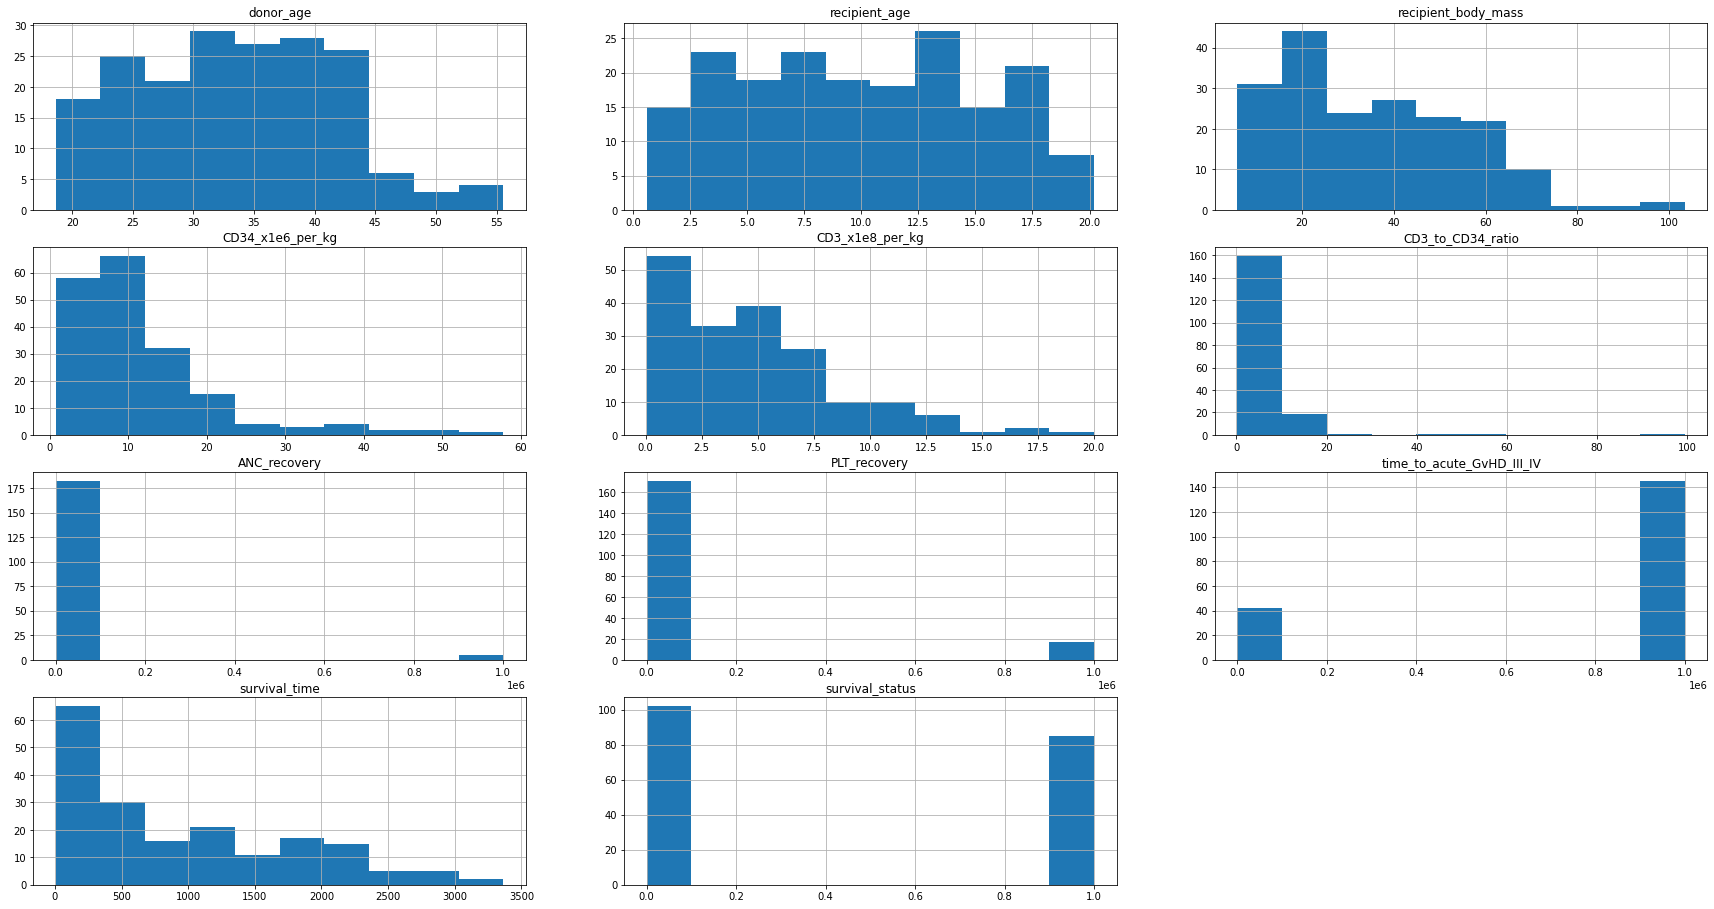

In [ ]:
##########Ploting Data##########
plt.figure(figsize=(30,20))

for i, feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

In [ ]:
len(cat_col)

19

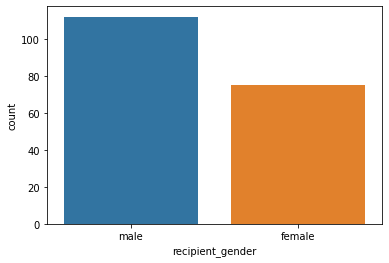

In [ ]:
sns.countplot(df['recipient_gender'])

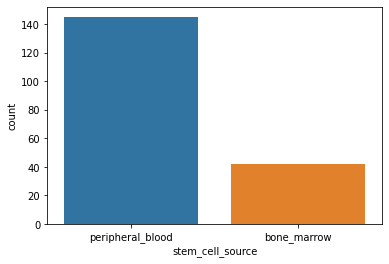

In [ ]:
sns.countplot(df['stem_cell_source'])

In [ ]:
df.corr()


,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,survival_time,survival_status
donor_age,1.000000,0.094282,0.106707,0.072530,0.023555,0.144919,-0.005872,-0.056949,0.016548,0.005603,0.060384
recipient_age,0.094282,1.000000,0.897538,-0.454347,-0.430737,0.053913,0.114914,0.101815,0.136641,-0.137583,0.203406
recipient_body_mass,0.106707,0.897538,1.000000,-0.465137,-0.453562,0.061390,0.126368,0.120668,0.132369,-0.145298,0.238110
CD34_x1e6_per_kg,0.072530,-0.454347,-0.465137,1.000000,0.583284,-0.130573,-0.086835,-0.180256,0.010245,0.139313,-0.146653
CD3_x1e8_per_kg,0.023555,-0.430737,-0.453562,0.583284,1.000000,-0.370918,-0.099749,-0.113199,-0.035355,0.060991,-0.232331
CD3_to_CD34_ratio,0.144919,0.053913,0.061390,-0.130573,-0.370918,1.000000,0.024662,-0.010890,0.030236,0.044016,0.089868
ANC_recovery,-0.005872,0.114914,0.126368,-0.086835,-0.099749,0.024662,1.000000,0.524145,0.089205,-0.180974,0.181569
PLT_recovery,-0.056949,0.101815,0.120668,-0.180256,-0.113199,-0.010890,0.524145,1.000000,-0.052677,-0.325751,0.346395
time_to_acute_GvHD_III_IV,0.016548,0.136641,0.132369,0.010245,-0.035355,0.030236,0.089205,-0.052677,1.000000,0.131168,-0.100601
survival_time,0.005603,-0.137583,-0.145298,0.139313,0.060991,0.044016,-0.180974,-0.325751,0.131168,1.000000,-0.761462


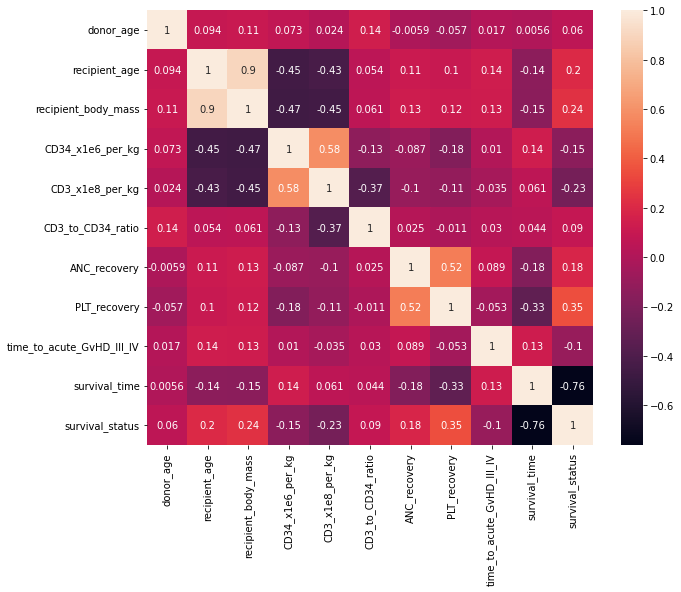

In [ ]:
########## Correlation shows which is correalted with which column############
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(),annot=True)

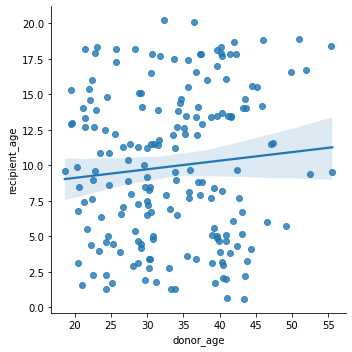

In [ ]:

sns.lmplot(x='donor_age', y='recipient_age', data=df)

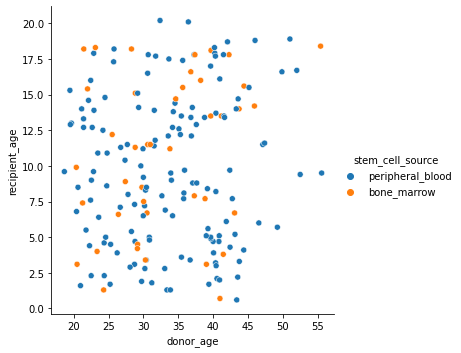

In [ ]:
sns.relplot(x='donor_age',y='recipient_age', hue = 'stem_cell_source',data=df)

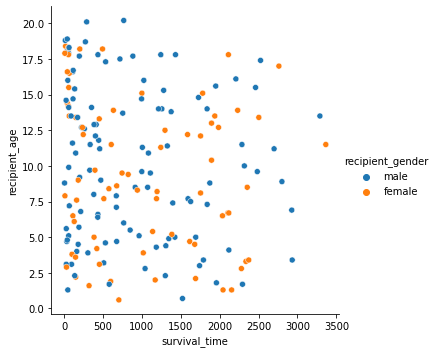

In [ ]:
sns.relplot(x='survival_time',y='recipient_age', hue = 'recipient_gender',data=df)

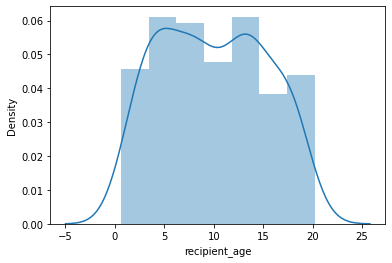

In [ ]:
sns.distplot(df['recipient_age'])

In [ ]:
px.violin(df,y= 'recipient_age',x ='disease_group')

In [ ]:
df.columns

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_gender', 'recipient_body_mass',
       'recipient_ABO', 'recipient_rh', 'recipient_CMV', 'disease',
       'disease_group', 'ABO_match', 'CMV_status', 'HLA_match', 'allel',
       'HLA_group_1', 'risk_group', 'stem_cell_source', 'tx_post_relapse',
       'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio',
       'ANC_recovery', 'PLT_recovery', 'time_to_acute_GvHD_III_IV',
       'extensive_chronic_GvHD', 'relapse', 'survival_time',
       'survival_status'],
      dtype='object')

In [ ]:
px.scatter(df,x='donor_age', y =  'recipient_age')

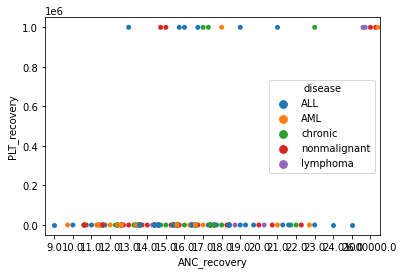

In [ ]:
sns.swarmplot(x='ANC_recovery', y='PLT_recovery', data=df, 
              hue='disease')

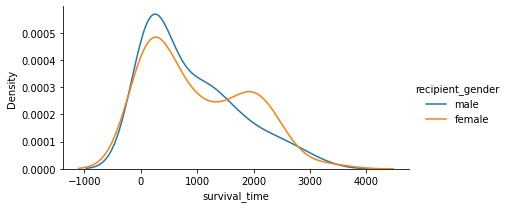

In [ ]:
grid = sns.FacetGrid(df,hue='recipient_gender',aspect = 2)
grid.map(sns.kdeplot,'survival_time')
grid.add_legend()

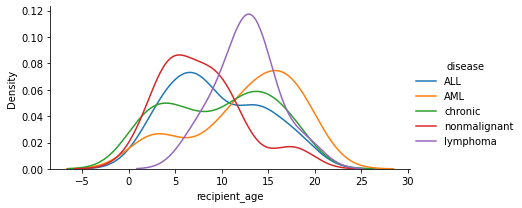

In [ ]:
##### Showing info about disease and recipent age##########
grid = sns.FacetGrid(df,hue='disease',aspect = 2)
grid.map(sns.kdeplot,'recipient_age')
grid.add_legend()

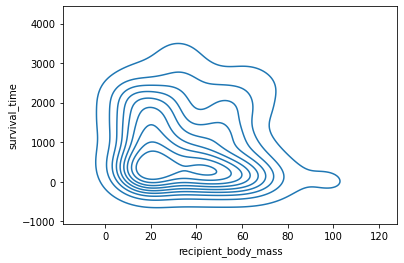

In [ ]:
sns.kdeplot(df.recipient_body_mass, df.survival_time)

In [ ]:
##############Scatter Plot##############
fig = px.scatter(df, x="recipient_body_mass", y="recipient_age", color="survival_status")
fig.show()

In [ ]:
fig = px.scatter(df, x="recipient_body_mass", y="survival_time", color="recipient_gender")
fig.show()

In [ ]:
#########Box and Scatter#############
fig = px.scatter(df, x="donor_age", y="recipient_age", color="disease", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
df.dtypes

donor_age                    float64
donor_age_below_35            object
donor_ABO                     object
donor_CMV                     object
recipient_age                float64
recipient_gender              object
recipient_body_mass          float64
recipient_ABO                 object
recipient_rh                  object
recipient_CMV                 object
disease                       object
disease_group                 object
ABO_match                     object
CMV_status                    object
HLA_match                     object
allel                         object
HLA_group_1                   object
risk_group                    object
stem_cell_source              object
tx_post_relapse               object
CD34_x1e6_per_kg             float64
CD3_x1e8_per_kg              float64
CD3_to_CD34_ratio            float64
ANC_recovery                 float64
PLT_recovery                 float64
time_to_acute_GvHD_III_IV    float64
extensive_chronic_GvHD        object
r

In [ ]:
############Describe this#############
fig = px.scatter_matrix(df, dimensions=["donor_age", "recipient_age","CD3_to_CD34_ratio",'survival_time'], color="risk_group")
fig.show()

In [ ]:
df.columns

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_gender', 'recipient_body_mass',
       'recipient_ABO', 'recipient_rh', 'recipient_CMV', 'disease',
       'disease_group', 'ABO_match', 'CMV_status', 'HLA_match', 'allel',
       'HLA_group_1', 'risk_group', 'stem_cell_source', 'tx_post_relapse',
       'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio',
       'ANC_recovery', 'PLT_recovery', 'time_to_acute_GvHD_III_IV',
       'extensive_chronic_GvHD', 'relapse', 'survival_time',
       'survival_status'],
      dtype='object')

In [ ]:
df.dtypes

donor_age                    float64
donor_age_below_35            object
donor_ABO                     object
donor_CMV                     object
recipient_age                float64
recipient_gender              object
recipient_body_mass          float64
recipient_ABO                 object
recipient_rh                  object
recipient_CMV                 object
disease                       object
disease_group                 object
ABO_match                     object
CMV_status                    object
HLA_match                     object
allel                         object
HLA_group_1                   object
risk_group                    object
stem_cell_source              object
tx_post_relapse               object
CD34_x1e6_per_kg             float64
CD3_x1e8_per_kg              float64
CD3_to_CD34_ratio            float64
ANC_recovery                 float64
PLT_recovery                 float64
time_to_acute_GvHD_III_IV    float64
extensive_chronic_GvHD        object
r

#############
Creating functions to automate our EDA

In [ ]:
def violin(col):
    fig=px.violin(df,y=col,x='survival_status',color = 'disease',box=True)
    return fig.show()

In [ ]:
def scatters(col1,col2):
    fig = px.scatter(df,x=col1,y=col2,color='survival_status')
    return fig.show()

In [ ]:
 def kde_plot(feature):   
    grid = sns.FacetGrid(df,hue='survival_status',aspect = 2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()
    

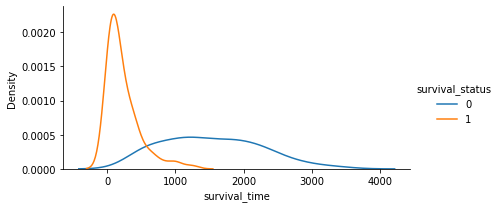

In [ ]:
kde_plot('survival_time')

In [ ]:
scatters('recipient_age','survival_time')

In [ ]:
violin('HLA_match')

In [ ]:
violin('recipient_body_mass')

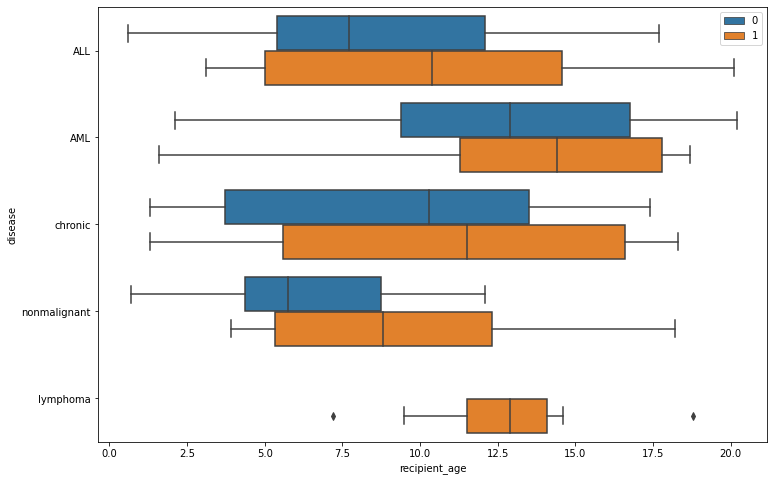

In [ ]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="recipient_age",
            y="disease",
            hue="survival_status",
            data=df)
plt.legend(loc="upper right")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_gender           187 non-null    object 
 6   recipient_body_mass        185 non-null    float64
 7   recipient_ABO              187 non-null    object 
 8   recipient_rh               187 non-null    object 
 9   recipient_CMV              187 non-null    object 
 10  disease                    187 non-null    object 
 11  disease_group              187 non-null    object 
 12  ABO_match                  187 non-null    object 
 13  CMV_status                 187 non-null    object 

Previously we obserevd that we had some nan values.Data Cleaning for missing values

In [ ]:
df.isnull().sum().sort_values(ascending = True)

donor_age                    0
relapse                      0
extensive_chronic_GvHD       0
time_to_acute_GvHD_III_IV    0
PLT_recovery                 0
ANC_recovery                 0
CD34_x1e6_per_kg             0
tx_post_relapse              0
stem_cell_source             0
risk_group                   0
HLA_group_1                  0
allel                        0
survival_time                0
HLA_match                    0
ABO_match                    0
disease_group                0
disease                      0
recipient_CMV                0
recipient_rh                 0
recipient_ABO                0
recipient_gender             0
recipient_age                0
donor_CMV                    0
donor_ABO                    0
donor_age_below_35           0
CMV_status                   0
survival_status              0
recipient_body_mass          2
CD3_x1e8_per_kg              5
CD3_to_CD34_ratio            5
dtype: int64

In [ ]:
df['CD3_x1e8_per_kg'].isnull().sum()

5

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[num_col].isnull().sum()

donor_age                    0
recipient_age                0
recipient_body_mass          0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              0
CD3_to_CD34_ratio            0
ANC_recovery                 0
PLT_recovery                 0
time_to_acute_GvHD_III_IV    0
survival_time                0
survival_status              0
dtype: int64

In [ ]:
df[cat_col].isnull().sum()

donor_age_below_35        0
donor_ABO                 0
donor_CMV                 0
recipient_gender          0
recipient_ABO             0
recipient_rh              0
recipient_CMV             0
disease                   0
disease_group             0
ABO_match                 0
CMV_status                0
HLA_match                 0
allel                     0
HLA_group_1               0
risk_group                0
stem_cell_source          0
tx_post_relapse           0
extensive_chronic_GvHD    0
relapse                   0
dtype: int64

In [ ]:
###############Data Is cleaned fully

We have completed our EDA. Now we will look into feature importance & will 

*   List item
*   List item

selec the prediction model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data = df

In [ ]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,ABO_match,CMV_status,HLA_match,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,1,1,2,9.6,1,35.0,2,2,2,0,0,1,3,0,0,1,0,1,0,7.20,5.38,1.338760,19.0,51.0,32.0,1,0,999.0,0
1,23.342466,1,3,1,4.0,1,20.6,4,2,1,0,0,1,0,0,0,1,1,0,0,4.50,0.41,11.078295,16.0,37.0,1000000.0,1,1,163.0,1
2,26.394521,1,3,1,6.6,1,23.4,4,2,2,0,0,1,2,0,0,1,1,0,0,7.94,0.42,19.013230,23.0,20.0,1000000.0,1,1,435.0,1
3,39.684932,0,1,2,18.1,0,50.0,3,2,1,1,0,2,1,0,0,1,1,0,0,4.25,0.14,29.481647,23.0,29.0,19.0,0,0,53.0,1
4,33.358904,1,1,1,1.3,0,9.0,3,1,2,2,0,2,0,3,1,4,0,1,0,51.85,13.05,3.972255,14.0,14.0,1000000.0,1,0,2043.0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ind_col =[col for col in data.columns if col!='survival_status']
dep_col='survival_status'

In [ ]:
X= data[ind_col]
y = data[dep_col]

In [ ]:
X.head()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_gender,recipient_body_mass,recipient_ABO,recipient_rh,recipient_CMV,disease,disease_group,ABO_match,CMV_status,HLA_match,allel,HLA_group_1,risk_group,stem_cell_source,tx_post_relapse,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time
0,22.830137,1,1,2,9.6,1,35.0,2,2,2,0,0,1,3,0,0,1,0,1,0,7.20,5.38,1.338760,19.0,51.0,32.0,1,0,999.0
1,23.342466,1,3,1,4.0,1,20.6,4,2,1,0,0,1,0,0,0,1,1,0,0,4.50,0.41,11.078295,16.0,37.0,1000000.0,1,1,163.0
2,26.394521,1,3,1,6.6,1,23.4,4,2,2,0,0,1,2,0,0,1,1,0,0,7.94,0.42,19.013230,23.0,20.0,1000000.0,1,1,435.0
3,39.684932,0,1,2,18.1,0,50.0,3,2,1,1,0,2,1,0,0,1,1,0,0,4.25,0.14,29.481647,23.0,29.0,19.0,0,0,53.0
4,33.358904,1,1,1,1.3,0,9.0,3,1,2,2,0,2,0,3,1,4,0,1,0,51.85,13.05,3.972255,14.0,14.0,1000000.0,1,0,2043.0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
182    1
183    1
184    0
185    1
186    0
Name: survival_status, Length: 182, dtype: int64

In [ ]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(X,y)

In [ ]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7f007d8ef0e0>)

In [ ]:
ordered_feature.scores_

array([2.17147479e+00, 1.22723872e+00, 5.40863786e-02, 1.18362390e-01,
       1.90199712e+01, 8.23579810e-02, 1.08080071e+02, 1.27994184e-06,
       6.70401039e-02, 2.92629263e-01, 2.46690923e-02, 1.02156847e+00,
       1.93069307e-01, 1.01571387e+00, 1.17345579e-01, 2.73805158e-03,
       1.01207878e-02, 1.61164615e+00, 7.70349022e-01, 2.49371556e+00,
       3.95011765e+01, 3.06597762e+01, 2.50105869e+01, 4.98415927e+06,
       1.99410709e+07, 4.04380397e+05, 2.98671359e+00, 1.60595282e+01,
       7.76599042e+04])

In [ ]:
datascores = pd.DataFrame(ordered_feature.scores_,columns=['Score'])

In [ ]:
datascores

,Score
0,2.171475e+00
1,1.227239e+00
2,5.408638e-02
3,1.183624e-01
4,1.901997e+01
5,8.235798e-02
6,1.080801e+02
7,1.279942e-06
8,6.704010e-02
9,2.926293e-01


In [ ]:
dfcols = pd.DataFrame(X.columns)
dfcols

,0
0,donor_age
1,donor_age_below_35
2,donor_ABO
3,donor_CMV
4,recipient_age
5,recipient_gender
6,recipient_body_mass
7,recipient_ABO
8,recipient_rh
9,recipient_CMV


In [ ]:
features_rank = pd.concat([dfcols,datascores],axis=1)
features_rank

,0,Score
0,donor_age,2.171475e+00
1,donor_age_below_35,1.227239e+00
2,donor_ABO,5.408638e-02
3,donor_CMV,1.183624e-01
4,recipient_age,1.901997e+01
5,recipient_gender,8.235798e-02
6,recipient_body_mass,1.080801e+02
7,recipient_ABO,1.279942e-06
8,recipient_rh,6.704010e-02
9,recipient_CMV,2.926293e-01


In [ ]:
features_rank.nlargest(10,'Score')

,0,Score
24,PLT_recovery,1.994107e+07
23,ANC_recovery,4.984159e+06
25,time_to_acute_GvHD_III_IV,4.043804e+05
28,survival_time,7.765990e+04
6,recipient_body_mass,1.080801e+02
20,CD34_x1e6_per_kg,3.950118e+01
21,CD3_x1e8_per_kg,3.065978e+01
22,CD3_to_CD34_ratio,2.501059e+01
4,recipient_age,1.901997e+01
27,relapse,1.605953e+01


In [ ]:
selected_columns = features_rank.nlargest(10,'Score')[0].values

In [ ]:
selected_columns

array(['PLT_recovery', 'ANC_recovery', 'time_to_acute_GvHD_III_IV',
       'survival_time', 'recipient_body_mass', 'CD34_x1e6_per_kg',
       'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio', 'recipient_age', 'relapse'],
      dtype=object)

In [ ]:
X_new = data[selected_columns]
X_new.head()

,PLT_recovery,ANC_recovery,time_to_acute_GvHD_III_IV,survival_time,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,recipient_age,relapse
0,51.0,19.0,32.0,999.0,35.0,7.20,5.38,1.338760,9.6,0
1,37.0,16.0,1000000.0,163.0,20.6,4.50,0.41,11.078295,4.0,1
2,20.0,23.0,1000000.0,435.0,23.4,7.94,0.42,19.013230,6.6,1
3,29.0,23.0,19.0,53.0,50.0,4.25,0.14,29.481647,18.1,0
4,14.0,14.0,1000000.0,2043.0,9.0,51.85,13.05,3.972255,1.3,0


In [ ]:
len(X_new)

182

In [ ]:
X_new.shape

(182, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test =  train_test_split(X_new,y,random_state=109,test_size=0.25)

Using XGboost classsifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(136, 10)
(46, 10)


In [ ]:
y_train.value_counts()

0    77
1    59
Name: survival_status, dtype: int64

In [ ]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 1}

In [ ]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gama=0.0, gamma=0,
              gpu_id=0, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='0',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [ ]:
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.3, gama=0.0, gpu_id=0,
              interaction_constraints='', learning_rate=0.05, max_depth=5,
              monotone_constraints='0', n_jobs=8, num_parallel_tree=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=0)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[24  0]
 [ 3 19]]


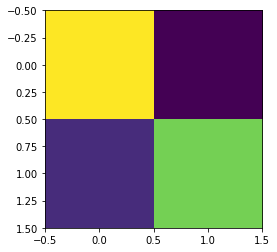

In [ ]:
plt.imshow(confusion)

In [ ]:
#######From XGboost accuracy
accuracy_score(y_test, y_pred)

0.9347826086956522

Using LInear Regression

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True])

In [ ]:
cols=X.columns

In [ ]:
selected_feat = cols[(feature_sel_model.get_support())]

In [ ]:
selected_feat

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_gender', 'recipient_body_mass',
       'recipient_ABO', 'recipient_rh', 'recipient_CMV', 'disease',
       'disease_group', 'ABO_match', 'CMV_status', 'HLA_match', 'allel',
       'HLA_group_1', 'risk_group', 'stem_cell_source', 'tx_post_relapse',
       'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg', 'CD3_to_CD34_ratio',
       'extensive_chronic_GvHD', 'relapse', 'survival_time'],
      dtype='object')

In [ ]:
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 29
selected features: 26


In [ ]:
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 29
selected features: 26


In [ ]:
X=X[selected_feat]

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[27,  1],
       [ 4, 14]])

In [ ]:
###########From Linear regression
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8913043478260869

Cross Validation with other models 


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,X,y,cv=10)

In [ ]:
score

array([0.94736842, 1.        , 1.        , 1.        , 0.83333333,
       0.83333333, 0.94444444, 0.88888889, 1.        , 0.88888889])

In [ ]:
score.mean()

0.9336257309941521

In [ ]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [ ]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    # Make predictions.
    predictions = model.predict(x_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[27  4]
 [ 1 14]]
0.8913043478260869


Naive Bayes
[[26  6]
 [ 2 12]]
0.8260869565217391


RandomForest
[[27  4]
 [ 1 14]]
0.8913043478260869


Decision Tree
[[24  3]
 [ 4 15]]
0.8478260869565217


KNN
[[28  3]
 [ 0 15]]
0.9347826086956522




In [ ]:
##########Cross Validation#### of Accuracy########

MOdel Accuracy: 

1.   XgbClasifier: 93%
2.   Logistic Regression: 89%
3.   Naive Bayes:85%
4.   RandomForest: 89%
5.   Decision Tree: 84%
6.   KNN: 93%

